### Convergence Testing
##### See lab notebook p. 28 for explanation

__Experiment Names__
* `Notebook_test`
* `hundred_k_steps`

__NOTES__
1. With `b_top = .5` (B annealing with + field), M will likely be positive at lower temps, and so $M = |M|$. This is used for the expected, analytic value of M

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# note: first clear data directory, and make sure series and snapshots directories exist

In [5]:
# parameters
n_slope = 5000
n_burnin = 10000
n_analyze = 100000
n_steps = n_slope + n_burnin + n_analyze # ising.py takes this as an arg instead of n_slope
N = 100
b_top = 0.5

t_min = 1.3
t_step = 0.5
t_max = 3.4

multiprocess = False # multiprocess does not seem to be working. Also it doesn't help much with runs of few T values.

# run simulation:
# NOTE: this puts data in temporary directories (here, 'snapshots', 'data', and 'series'). Should be moved IMMEDIATELY
# (shell commands to move the data are in the next two cells)

!python ising.py n_steps:$n_steps n_burnin:$n_burnin n_analyze:$n_analyze N:$N b_top:$b_top t_min:$t_min t_max:$t_max \
                 t_step:$t_step multiprocess:$multiprocess

inp["n_steps"]       set to int     115000
inp["n_burnin"]      set to int     10000
inp["n_analyze"]     set to int     100000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   1.3
inp["t_max"]         set to float   3.4
inp["t_step"]        set to float   0.5

2D Ising Model Simulation; single core

100x100 (T=1.30) steps:  115000/ 115000, 100.0%  run time: 00:00:15  est.time-to-go:    done!
100x100 (T=1.80) steps:  115000/ 115000, 100.0%  run time: 00:00:16  est.time-to-go:    done!
100x100 (T=2.30) steps:  115000/ 115000, 100.0%  run time: 00:00:17  est.time-to-go:    done!
100x100 (T=2.80) steps:  115000/ 115000, 100.0%  run time: 00:00:18  est.time-to-go:    done!
100x100 (T=3.30) steps:  115000/ 115000, 100.0%  run time: 00:00:19  est.time-to-go:    done!


In [6]:
Experiment_name = "hundred_k_steps"

In [7]:
# move data automatically
!mkdir datatests/$Experiment_name 
!mv data datatests/$Experiment_name
!mv snapshots datatests/$Experiment_name
!mv series datatests/$Experiment_name
!mkdir data
!mkdir snapshots
!mkdir series

In [8]:
# load data
E = np.load(f"datatests/{Experiment_name}/series/E_series.npy")
M = np.load(f"datatests/{Experiment_name}/series/M_series.npy")

In [9]:
temps = E[:, 0] # make temp array

In [10]:
# make moving average:
window_size = 1000
E_avg = np.zeros((E.shape[0], E.shape[1] - window_size - 1)) #-1 bc average doesn't have a temp column
M_avg = np.zeros((E.shape[0], E.shape[1] - window_size - 1))

for i in range(E_avg.shape[0]):
    for j in range(E_avg.shape[1]):
        E_avg[i][j] = np.average(E[i][(1+j):(window_size+j+1)])
        M_avg[i][j] = np.average(M[i][(1+j):(window_size+j+1)])
        
# centers of ranges
xp = np.arange(window_size/2, E.shape[1] - window_size/2 - 1)

In [41]:
# make moving std:
window_size = 1000
E_std = np.zeros((E.shape[0], E.shape[1] - window_size - 1)) #-1 bc std doesn't have a temp column
M_std = np.zeros((E.shape[0], E.shape[1] - window_size - 1))

for i in range(E_std.shape[0]):
    for j in range(E_std.shape[1]):
        E_std[i][j] = np.std(E[i][(1+j):(window_size+j+1)])
        M_std[i][j] = np.std(M[i][(1+j):(window_size+j+1)])

In [18]:
# get analyze averages:
short_n_analyze = 10000
short_e_avg = np.average(E[:, 1+n_slope+n_burnin:1+n_slope+n_burnin+short_n_analyze], axis=1)
short_m_avg = np.average(M[:, 1+n_slope+n_burnin:1+n_slope+n_burnin+short_n_analyze], axis=1)

long_e_avg = np.average(E[:, 1+n_slope+n_burnin:], axis=1)
long_m_avg = np.average(M[:, 1+n_slope+n_burnin:], axis=1)

In [37]:
# and std
short_e_std = np.std(E[:, 1+n_slope+n_burnin:1+n_slope+n_burnin+short_n_analyze], axis=1)
short_m_std = np.std(M[:, 1+n_slope+n_burnin:1+n_slope+n_burnin+short_n_analyze], axis=1)

long_e_std = np.std(E[:, 1+n_slope+n_burnin:], axis=1)
long_m_std = np.std(M[:, 1+n_slope+n_burnin:], axis=1)

In [40]:
i = 2
print(short_m_avg[i], short_m_std[i])
print(long_m_avg[i], long_m_std[i])

0.17256690006667486 0.0741834101141615
0.13962471629314854 0.17889050007257118


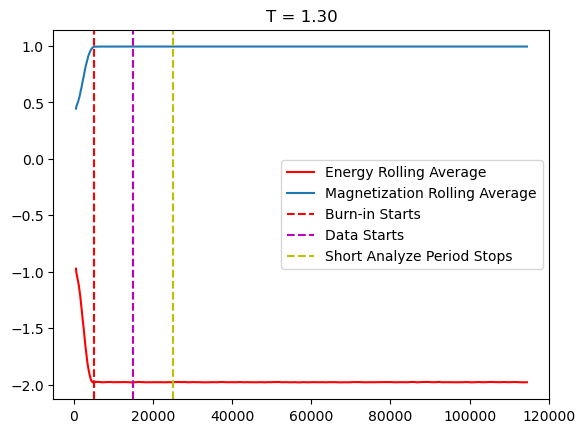

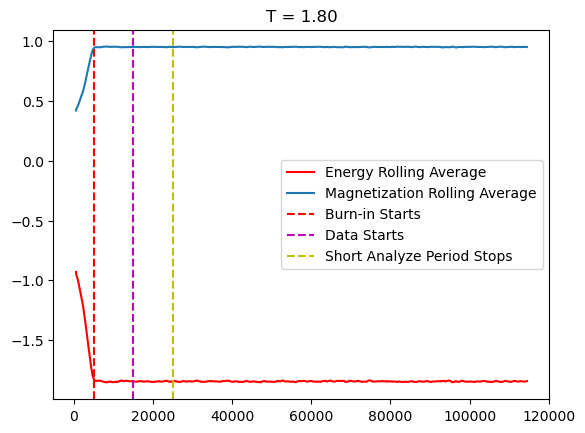

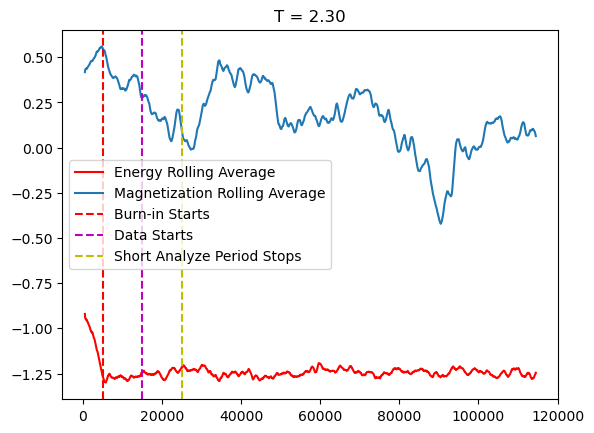

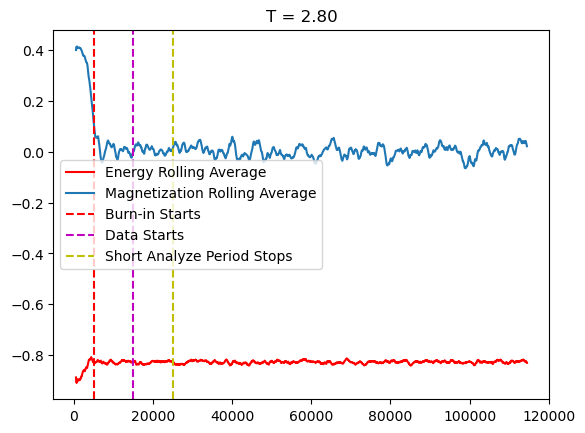

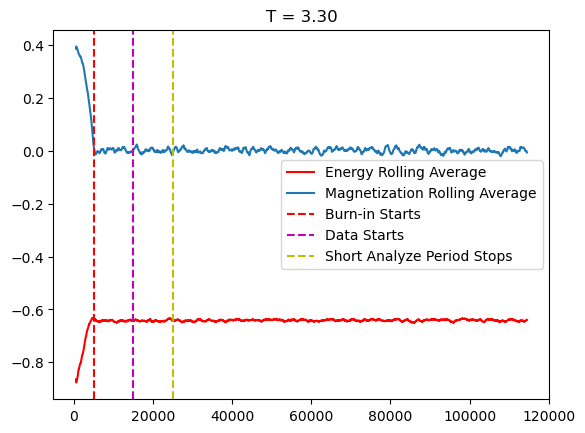

In [35]:
n_graphs = 5
for i in np.linspace(0, len(temps) - 1, n_graphs):
    i = int(i)
    plt.plot(xp, E_avg[i], c='red', label='Energy Rolling Average')
    plt.plot(xp, M_avg[i], label='Magnetization Rolling Average')
    plt.title(f"T = {temps[i]:.2f}")
    plt.axvline(x=n_slope, c='r', ls='--', label='Burn-in Starts')
    plt.axvline(x=n_slope + n_burnin, c='m', ls='--', label="Data Starts")
    plt.axvline(x=n_slope + n_burnin + short_n_analyze, c='y', ls='--', label="Short Analyze Period Stops")
    
#     plt.plot([short_e_avg[i] for x in xp], label=f'E avg after {short_n_analyze} steps')
#     plt.plot([long_e_avg[i] for x in xp], label=f'E avg after {n_analyze} steps')
#     plt.plot([short_m_avg[i] for x in xp], label=f'M avg after {short_n_analyze} steps')
#     plt.plot([long_m_avg[i] for x in xp], label=f'M avg after {n_analyze} steps')
    
    plt.legend()
    plt.show()

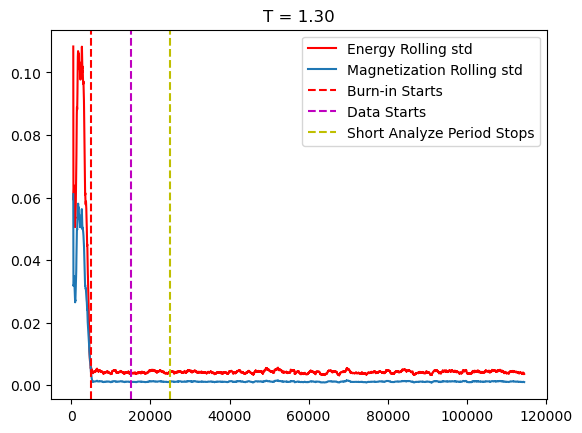

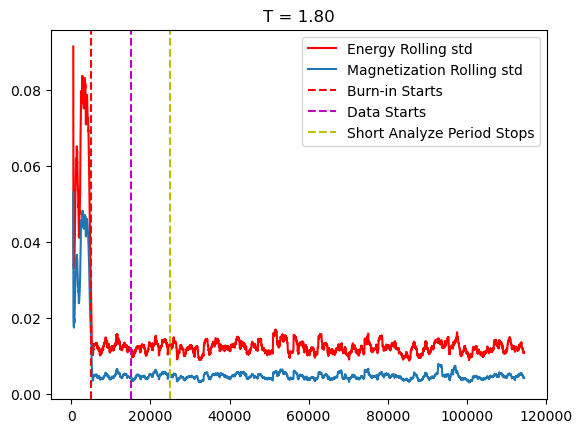

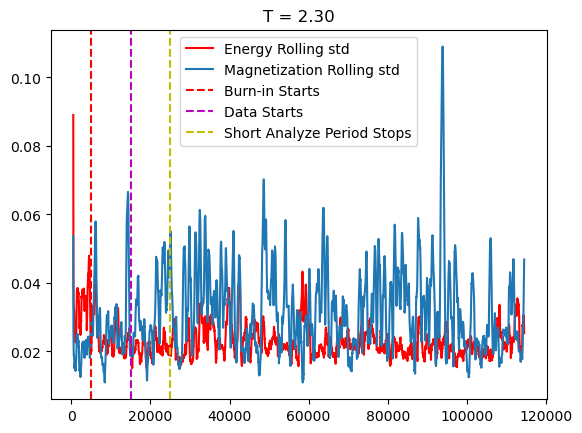

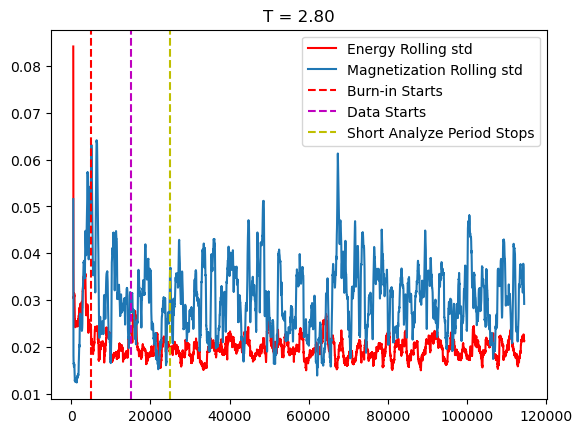

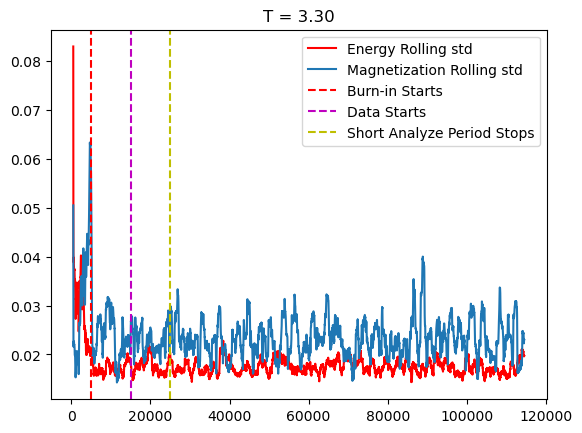

In [42]:
# now the same deal but with std
n_graphs = 5
for i in np.linspace(0, len(temps) - 1, n_graphs):
    i = int(i)
    plt.plot(xp, E_std[i], c='red', label='Energy Rolling std')
    plt.plot(xp, M_std[i], label='Magnetization Rolling std')
    plt.title(f"T = {temps[i]:.2f}")
    plt.axvline(x=n_slope, c='r', ls='--', label='Burn-in Starts')
    plt.axvline(x=n_slope + n_burnin, c='m', ls='--', label="Data Starts")
    plt.axvline(x=n_slope + n_burnin + short_n_analyze, c='y', ls='--', label="Short Analyze Period Stops")
    
#     plt.plot([short_e_avg[i] for x in xp], label=f'E avg after {short_n_analyze} steps')
#     plt.plot([long_e_avg[i] for x in xp], label=f'E avg after {n_analyze} steps')
#     plt.plot([short_m_avg[i] for x in xp], label=f'M avg after {short_n_analyze} steps')
#     plt.plot([long_m_avg[i] for x in xp], label=f'M avg after {n_analyze} steps')
    
    plt.legend()
    plt.show()

In [ ]:
# a different kind of metric is accumulated standard deviation
# This isn't the best metric as a function of steps because it
# will always appear to converge (like accumulated average).

# One way around this (maybe) is to present x on a log scale?
# Like if the number of samples doubles, that should have the same
# kind of effect regardless of how many we started with
# (maybe?)

# another option is to compare 10 trials to one trial of 10x n_steps,
# or 100 trials to 10 trials of 10x steps, or similar.

In [45]:
# first, accumulated std:
# just looking at Tc for now, so
i = 2
accumulated_std = np.array([np.std(M[i][1+n_slope+n_burnin:1+n_slope+n_burnin+j]) for j in range(n_analyze - 1)])

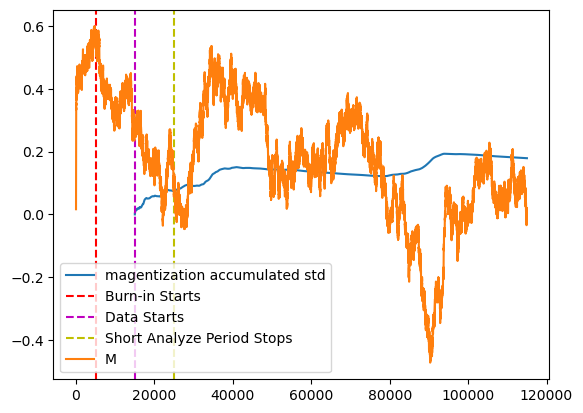

In [60]:
plt.plot(range(n_slope+n_burnin, n_slope+n_burnin+n_analyze-1), accumulated_std, label='magentization accumulated std')
# plt.plot(xp, M_avg[i], label='Magnetization Rolling Average')
plt.axvline(x=n_slope, c='r', ls='--', label='Burn-in Starts')
plt.axvline(x=n_slope + n_burnin, c='m', ls='--', label="Data Starts")
plt.axvline(x=n_slope + n_burnin + short_n_analyze, c='y', ls='--', label="Short Analyze Period Stops")
plt.plot(M[i][1:], label='M')
# plt.xscale('log')
plt.legend()
plt.show()